In [426]:
import pandas as pd
survey = pd.read_csv('Airport_Survey.csv')
survey.head()

,ID,Boarding Area,Terminal,Language,Gender,Where,Country,Bay Area,Airport Rating,Art Rating,...,Safety Rating,Aware Of Website,Used Website,Website Rating,Previous Departures This Year,Overall Satisfaction,Overall Cleanliness,Airport Wi Fi Use,Restaurant Spending,Retail Shop Spending
0,614,B,1,English,Female,Seattle,US,NaN,Fair,Good,...,Good,Yes,Yes,Poor,3+ Trips,66.666667,44.685453,No,67.281422,0.000000
1,940,B,1,English,Female,San Diego,US,NaN,Fair,Fair,...,Very Good,Yes,NaN,Poor,2 Trips,59.375000,72.724268,No,0.000000,26.077038
2,133,C,1,English,Female,Oakland,US,Alameda,Fair,Good,...,Very Good,Yes,Yes,Poor,2 Trips,61.111111,68.201548,No,56.940679,9.195947
3,1069,B,1,English,Female,Daeniuen,Netherlands,NaN,Fair,Fair,...,Fair,Yes,Yes,Fair,2 Trips,68.750000,66.585519,No,33.547721,43.479098
4,1068,B,1,English,Male,San Jose,US,Santa Clara,Fair,Good,...,Good,Yes,Yes,Fair,3+ Trips,65.384615,72.795526,No,18.193618,39.578618


In [427]:
def categorical(num,maximo):
    if num == 'NA': # NA
        return 0
    else:
        ratio = num/maximo
        if ((ratio >= 0) & (ratio < 0.2)): # Very Poor
            return 1
        elif ((ratio >= 0.2) & (ratio < 0.4)): # Poor
            return 2
        elif ((ratio >= 0.4) & (ratio < 0.6)): # Fair
            return 3
        elif ((ratio >= 0.6) & (ratio < 0.8)): # Good
            return 4
        else: # Very Good
            return 5 

def purpose(num):
    if num == 'NA':
        return 0
    elif num == 'Business':
        return 1
    elif num == 'Vacation':
        return 2
    elif num == 'Visiting Friends and Relatives':
        return 3
    else: # Others
        return 4

def transport(num):
    if num == 'NA':
        return 0
    elif num == 'Private Car':
        return 1
    elif num == 'Connecting flight':
        return 2
    elif num == 'BART':
        return 3
    elif num == 'Taxi':
        return 4
    else: # Others
        return 5

def country(num):
    if num == 'NA':
        return 0
    elif num == 'US':
        return 1
    elif num == 'Canada':
        return 2
    elif num == 'Japan':
        return 3
    elif num == 'China':
        return 4
    else: # Others
        return 5

def language(num):
    if num == 'NA':
        return 0
    elif num == 'English':
        return 1
    elif num == 'Chinese':
        return 2
    elif num == 'Japanese':
        return 3
    elif num == 'Spanish':
        return 4

In [428]:
survey.columns = [c.lower().replace(' ', '_') for c in survey.columns]

# Check data. Check amount of blanks (NaN) in columns
print(survey.shape)
print(survey.isnull().sum()) 

(1400, 47)
id                                  0
boarding_area                       0
terminal                            0
language                            0
gender                              7
where                              33
country                             9
bay_area                          969
airport_rating                     18
art_rating                        404
restaurant_rating                 371
moving_walkways_rating            176
arrival_booth_rating             1124
departure_booth_rating           1187
signage_rating                    664
directional_signs_rating           97
parking_rating                   1152
airtrain_rating                  1099
parking_shuttle_rating           1285
rental_car_center_rating         1233
retail_rating                     622
form_of_transportation             11
mode_of_transportation_rating     881
car_arrivals                      872
green_rental                      411
question_green_rental            1246
c

In [429]:
# Delete columns with >60% blanks
for col in survey.columns:    
    if survey[col].isnull().sum()/len(survey[col]) > 0.6:
        survey = survey.drop(col, axis=1)

print(survey.shape)
print(survey.isnull().sum()) 

(1400, 32)
id                                 0
boarding_area                      0
terminal                           0
language                           0
gender                             7
where                             33
country                            9
airport_rating                    18
art_rating                       404
restaurant_rating                371
moving_walkways_rating           176
signage_rating                   664
directional_signs_rating          97
retail_rating                    622
form_of_transportation            11
green_rental                     411
carbon_offset                     20
purpose_of_travel                 11
ease_of_finding_way_rating        32
security_rating                  176
airport_cleanliness               29
boarding_area_cleanliness         46
restaurant_cleanliness           606
restroom_cleanliness             298
safety_rating                     18
aware_of_website                  12
previous_departures_this_ye

In [430]:
# Manually delete not relevant data
col = ['id','boarding_area','terminal','where']

for a in col:
    print(survey[a].value_counts(dropna=False).head())

survey = survey.drop(col, axis=1)

1400    1
470     1
462     1
463     1
464     1
Name: id, dtype: int64
F     461
IA    211
IG    194
B     192
E     177
Name: boarding_area, dtype: int64
3                626
International    417
1                357
Name: terminal, dtype: int64
San Francisco    184
Seattle           37
New York City     34
NaN               33
Chicago           32
Name: where, dtype: int64


In [431]:
# Convert blanks into NA variables
survey.fillna(value='NA', inplace=True)

print(survey['art_rating'].value_counts(dropna=False))

Good         469
NA           404
Very Good    276
Fair         222
Poor          25
Very Poor      4
Name: art_rating, dtype: int64


In [432]:
# Data tokenization
for col in survey.columns:    
    if len(survey[col].unique()) == 6:
        survey[col] = survey[col].map({'NA':0,'Very Poor':1,'Poor':2,'Fair':3,'Good':4,'Very Good':5})
    if len(survey[col].unique()) == 3:
        if col == 'gender':
            survey[col] = survey[col].map({'NA':0,'Male':1,'Female':2})
        else:
            survey[col] = survey[col].map({'NA':0,'No':1,'Yes':2})
    if ((col == 'overall_satisfaction') | (col=='overall_cleanliness')):
        survey[col] = survey[col].apply(lambda x: categorical(x,100))
    if ((col == 'retail_shop_spending') | (col=='restaurant_spending')):
        maximo = survey[col].max()
        survey[col] = survey[col].apply(lambda x: categorical(x,maximo))
    if col == 'previous_departures_this_year':
        survey[col] = survey[col].map({'NA':0,'0 Trips':1,'1 Trip':2,'2 Trips':3,'3+ Trips':4})
    if col == 'purpose_of_travel':
        survey[col] = survey[col].apply(lambda x: purpose(x))
    if col == 'form_of_transportation':
        survey[col] = survey[col].apply(lambda x: transport(x))
    if col == 'country':
        survey[col] = survey[col].apply(lambda x: country(x))
    if col == 'language':
        survey[col] = survey[col].apply(lambda x: language(x))
        
print(survey['art_rating'].value_counts(dropna=False))

4    469
0    404
5    276
3    222
2     25
1      4
Name: art_rating, dtype: int64


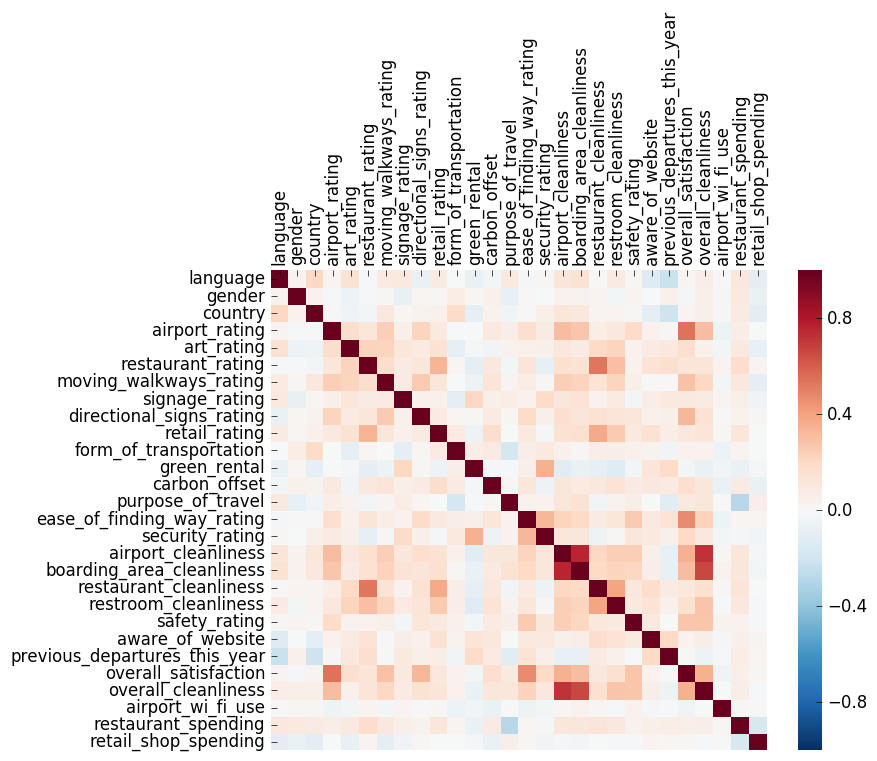

In [433]:
# Correlation between variables: 
# If 2 variables are high correlated we can exclude one of them from 
# our dataset as the other one is providing similar information 
# (in this case we could delete "bording_area_cleanliness", keeping "airport_cleanliness")

import seaborn as sns
from matplotlib import pyplot as plt

f, ax = plt.subplots()
ax.set_xticklabels(survey.columns, minor=False, rotation = 90)
sns.heatmap(survey.corr())
ax.xaxis.tick_top()
plt.figure(facecolor='white')
plt.show()

In [434]:
# Prepare data for model
y = survey['airport_rating']
X = survey.drop('airport_rating', axis=1)

In [435]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [436]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

performance = {'Stochastic Gradient Descent':0, 'Gaussian Naive Bayes':0, 'Linear SVC':0, 'Perceptron':0, 'Logistic Regression':0, 'KNN':0, 
           'Support Vector Machines':0, 'Random Forest':0, 'Decission Tree':0}

In [437]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_test)
performance['Decission Tree'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.5714285714285714

In [438]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)
performance['Random Forest'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.67142857142857137

In [439]:
# Support Vector Machine
supportvm = svm.SVC()
supportvm.fit(X_train, y_train)

y_predict = supportvm.predict(X_test)
performance['Support Vector Machines'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.60857142857142854

In [440]:
# KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
performance['KNN'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.53142857142857147

In [441]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)
performance['Logistic Regression'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.52000000000000002

In [442]:
# Perceptron
p = Perceptron()
p.fit(X_train, y_train)

y_predict = p.predict(X_test)
performance['Perceptron'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.2257142857142857

In [443]:
# Linear Support Vector Classification
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

y_predict = lsvc.predict(X_test)
performance['Linear SVC'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.51714285714285713

In [444]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_predict = gnb.predict(X_test)
performance['Gaussian Naive Bayes'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.32000000000000001

In [445]:
# Stochastic Gradient Descent
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

y_predict = sgdc.predict(X_test)
performance['Stochastic Gradient Descent'] = accuracy_score(y_test, y_predict)
accuracy_score(y_test, y_predict)

0.49142857142857144

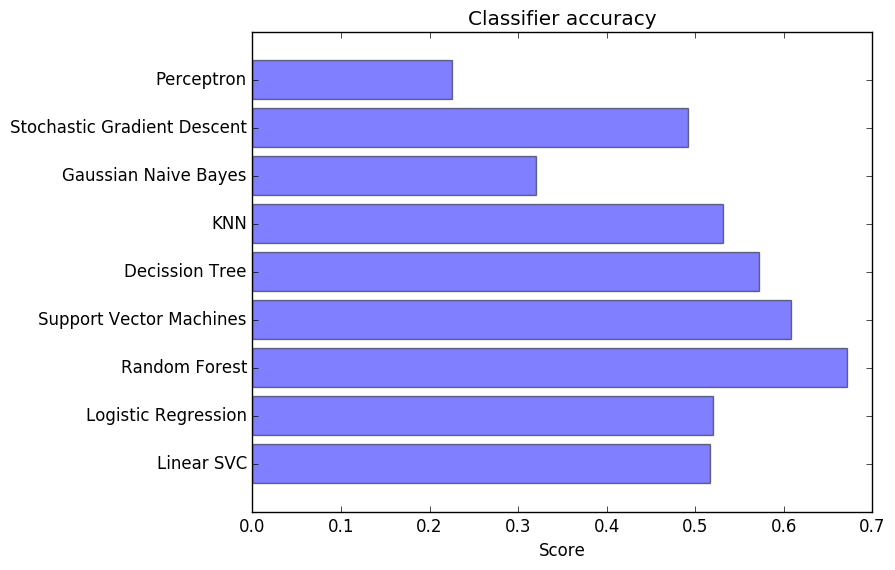

In [446]:
import numpy as np
plt.rcdefaults()
plt.figure(facecolor='white')

y_pos = np.arange(len(performance.keys()))
 
plt.barh(y_pos, performance.values(), align='center', alpha=0.5)
plt.yticks(y_pos, performance.keys())
plt.xlabel('Score')
plt.title('Classifier accuracy')

plt.show()